In [9]:

import matplotlib.pyplot as plt
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=False)
import plotly.figure_factory as ff
import plotly.graph_objs as go


from pyforest import*
import pandas as pd 
import numpy as np
import csv

In [10]:
df1 = pd.read_csv("C:/Users/suman/Downloads/IPL-Dataset-Analysis-2008-2020-main/IPL-Dataset-Analysis-2008-2020-main/IPL Ball-by-Ball 2008-2020.csv")
df2 = pd.read_csv("C:/Users/suman/Downloads/IPL-Dataset-Analysis-2008-2020-main/IPL-Dataset-Analysis-2008-2020-main/IPL Matches 2008-2020.csv")

In [11]:
x=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

df2.replace(x,y,inplace = True)
df1.replace(x,y,inplace = True)

In [62]:
df1.head()

id  inning  over  ball      batsman  non_striker     bowler  \
0  335982       1     6     5   RT Ponting  BB McCullum  AA Noffke   
1  335982       1     6     6  BB McCullum   RT Ponting  AA Noffke   
2  335982       1     7     1  BB McCullum   RT Ponting     Z Khan   
3  335982       1     7     2  BB McCullum   RT Ponting     Z Khan   
4  335982       1     7     3   RT Ponting  BB McCullum     Z Khan   

   batsman_runs  extra_runs  total_runs  non_boundary  is_wicket  \
0             1           0           1             0          0   
1             1           0           1             0          0   
2             0           0           0             0          0   
3             1           0           1             0          0   
4             1           0           1             0          0   

  dismissal_kind player_dismissed fielder extras_type batting_team  \
0            NaN              NaN     NaN         NaN          KKR   
1            NaN              NaN     NaN         NaN          KKR   
2            NaN              NaN     NaN         NaN          KKR   
3            NaN              NaN     NaN         NaN          KKR   
4            NaN              NaN     NaN         NaN          KKR   

  bowling_team  
0          RCB  
1          RCB  
2          RCB  
3          RCB  
4          RCB

In [63]:
df2.head()

id        city        date player_of_match  \
0  335982   Bangalore  2008-04-18     BB McCullum   
1  335983  Chandigarh  2008-04-19      MEK Hussey   
2  335984       Delhi  2008-04-19     MF Maharoof   
3  335985      Mumbai  2008-04-20      MV Boucher   
4  335986     Kolkata  2008-04-20       DJ Hussey   

                                        venue  neutral_venue team1 team2  \
0                       M Chinnaswamy Stadium              0   RCB   KKR   
1  Punjab Cricket Association Stadium, Mohali              0  KXIP   CSK   
2                            Feroz Shah Kotla              0    DC    RR   
3                            Wankhede Stadium              0    MI   RCB   
4                                Eden Gardens              0   KKR   SRH   

  toss_winner toss_decision winner   result  result_margin eliminator method  \
0         RCB         field    KKR     runs          140.0          N    NaN   
1         CSK           bat    CSK     runs           33.0          N    NaN   
2          RR           bat     DC  wickets            9.0          N    NaN   
3          MI           bat    RCB  wickets            5.0          N    NaN   
4         SRH           bat    KKR  wickets            5.0          N    NaN   

     umpire1         umpire2  
0  Asad Rauf     RE Koertzen  
1  MR Benson      SL Shastri  
2  Aleem Dar  GA Pratapkumar  
3   SJ Davis       DJ Harper  
4  BF Bowden     K Hariharan

In [64]:
df2.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

In [65]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
id                 816 non-null int64
city               803 non-null object
date               816 non-null object
player_of_match    812 non-null object
venue              816 non-null object
neutral_venue      816 non-null int64
team1              816 non-null object
team2              816 non-null object
toss_winner        816 non-null object
toss_decision      816 non-null object
winner             812 non-null object
result             812 non-null object
result_margin      799 non-null float64
eliminator         812 non-null object
method             19 non-null object
umpire1            816 non-null object
umpire2            816 non-null object
dtypes: float64(1), int64(2), object(14)
memory usage: 108.5+ KB


In [66]:
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

column_name  percent_missing
id                            id         0.000000
toss_decision      toss_decision         0.000000
umpire1                  umpire1         0.000000
team2                      team2         0.000000
team1                      team1         0.000000
toss_winner          toss_winner         0.000000
venue                      venue         0.000000
date                        date         0.000000
neutral_venue      neutral_venue         0.000000
umpire2                  umpire2         0.000000
player_of_match  player_of_match         0.490196
winner                    winner         0.490196
result                    result         0.490196
eliminator            eliminator         0.490196
city                        city         1.593137
result_margin      result_margin         2.083333
method                    method        97.671569

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
id                  193468 non-null int64
inning              193468 non-null int64
over                193468 non-null int64
ball                193468 non-null int64
batsman             193468 non-null object
non_striker         193468 non-null object
bowler              193468 non-null object
batsman_runs        193468 non-null int64
extra_runs          193468 non-null int64
total_runs          193468 non-null int64
non_boundary        193468 non-null int64
is_wicket           193468 non-null int64
dismissal_kind      9495 non-null object
player_dismissed    9495 non-null object
fielder             6784 non-null object
extras_type         10233 non-null object
batting_team        193468 non-null object
bowling_team        193277 non-null object
dtypes: int64(9), object(9)
memory usage: 26.6+ MB


In [68]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df = pd.DataFrame({'column_name': df1.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

column_name  percent_missing
id                              id         0.000000
is_wicket                is_wicket         0.000000
non_boundary          non_boundary         0.000000
total_runs              total_runs         0.000000
batting_team          batting_team         0.000000
batsman_runs          batsman_runs         0.000000
extra_runs              extra_runs         0.000000
non_striker            non_striker         0.000000
batsman                    batsman         0.000000
ball                          ball         0.000000
over                          over         0.000000
inning                      inning         0.000000
bowler                      bowler         0.000000
bowling_team          bowling_team         0.098724
extras_type            extras_type        94.710753
dismissal_kind      dismissal_kind        95.092212
player_dismissed  player_dismissed        95.092212
fielder                    fielder        96.493477

## 3. Matches in every season

In [69]:
df2["season"]= df2["date"].str[:4].astype(int)

Text(0, 0.5, 'Count')

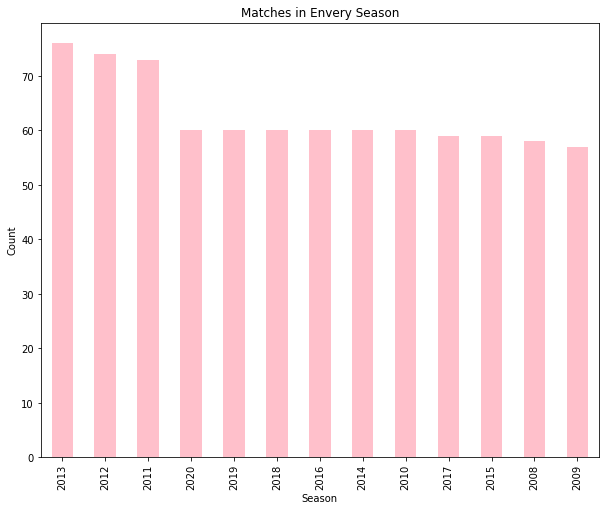

In [70]:
df2["season"].value_counts().plot(kind="bar",color="pink",figsize=(10,8))
plt.title('Matches in Envery Season')
plt.xlabel('Season')
plt.ylabel('Count')

1. The Year 2013 has most number of matches.
2. May be due to super over
3. Moreover there are 10 teams in 2011, 9 in 2012 and 2013 thats another reason for increase in number of matches.

## Matches Played vs Wins by Each Team

In [71]:
matches_played = pd.concat([df2["team1"],df2["team2"]])
matches_played = matches_played.value_counts().reset_index()
matches_played.columns = ["Team","Total Matches"]
matches_played["wins"] = df2["winner"].value_counts().reset_index()['winner']
matches_played.set_index("Team", inplace=True) 
  
totm= matches_played.reset_index()
totm

Team  Total Matches  wins
0     MI            203   120
1    SRH            199   106
2    RCB            195    99
3     DC            194    95
4    KKR            192    91
5   KXIP            190    88
6    CSK            178    86
7     RR            161    81
8     PW             46    15
9    RPS             30    13
10    GL             30    12
11   KTK             14     6

Text(0, 0.5, 'Count')

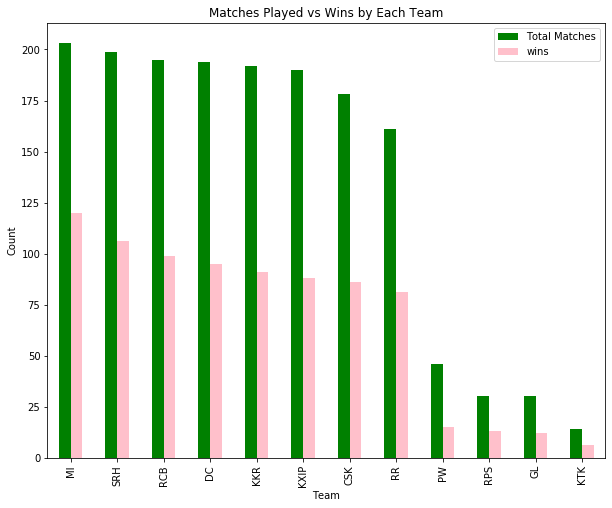

In [72]:
matches_played.plot(kind="bar",color=("green","Pink"),figsize=(10,8))
plt.title('Matches Played vs Wins by Each Team')
plt.xlabel('Team')
plt.ylabel('Count')

### 3.1 Matches played vs loss by team

Text(0, 0.5, 'Count')

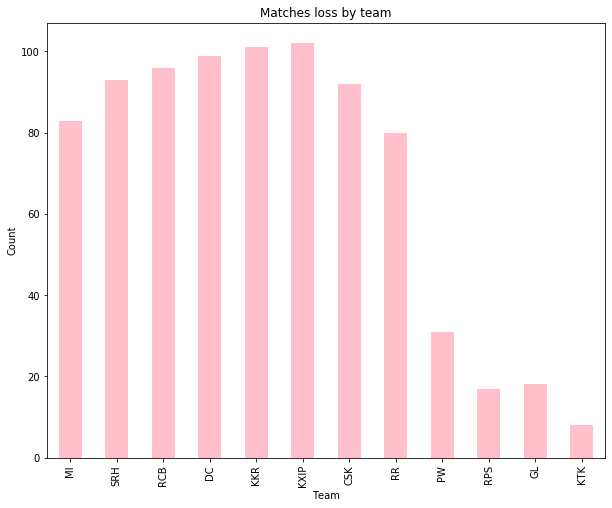

In [73]:
loss_matches = matches_played["Total Matches"] - matches_played["wins"]
loss_matches.plot(kind="bar",color="pink",figsize=(10,8))
plt.title('Matches loss by team')
plt.xlabel('Team')
plt.ylabel('Count')

### 3.2 TOSS Related Analysis

Text(0, 0.5, 'Number of Matches')

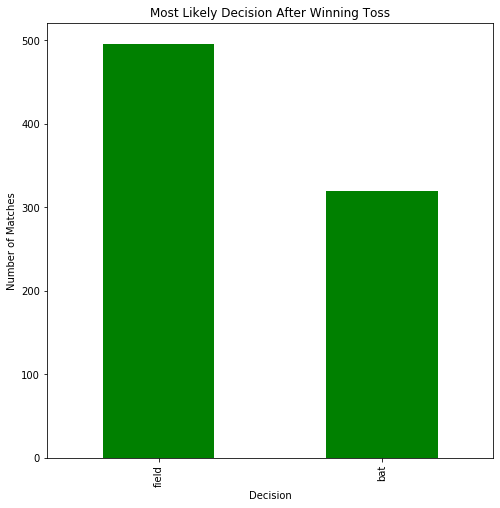

In [74]:
df2.toss_decision.value_counts().plot(kind="bar", color="green", figsize=(8,8))
plt.title('Most Likely Decision After Winning Toss')
plt.xlabel('Decision')
plt.ylabel('Number of Matches')

Text(0, 0.5, 'Toss Won')

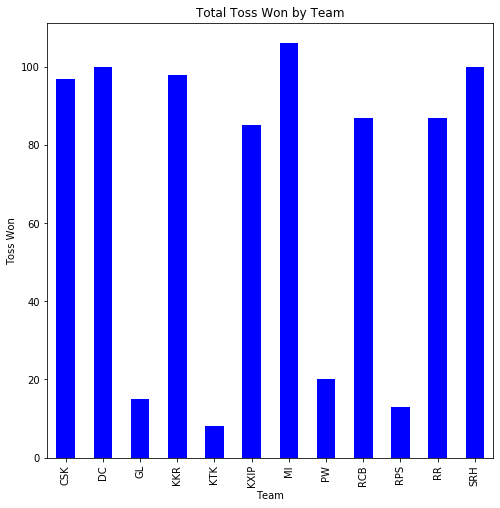

In [75]:
#Total toss won by team 
df2.groupby(df2.toss_winner).toss_winner.count().plot(kind="bar", color="blue",figsize=(8,8))
plt.title('Total Toss Won by Team')
plt.xlabel('Team')
plt.ylabel('Toss Won')

### 3.3 Venue of Most Matches

Text(0, 0.5, 'Matches Played')

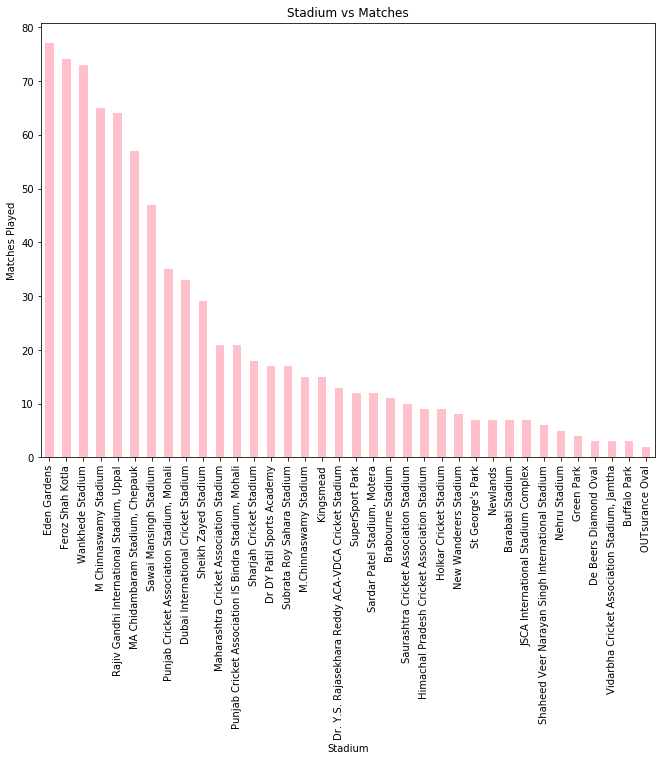

In [76]:
df2["venue"].value_counts().plot(kind="bar", color = "pink",figsize=(11,8))
plt.title("Stadium vs Matches")
plt.xlabel('Stadium')
plt.ylabel('Matches Played')

1. So Eden Gardens, M Chinnaswamy, Wankhede and Feroz Shah Kotla are statiums with most matches
2. Since Moslty eliminators, qualifiers and final of each season was here

### 3.4 Favorite Umpire

Text(0, 0.5, 'Matches')

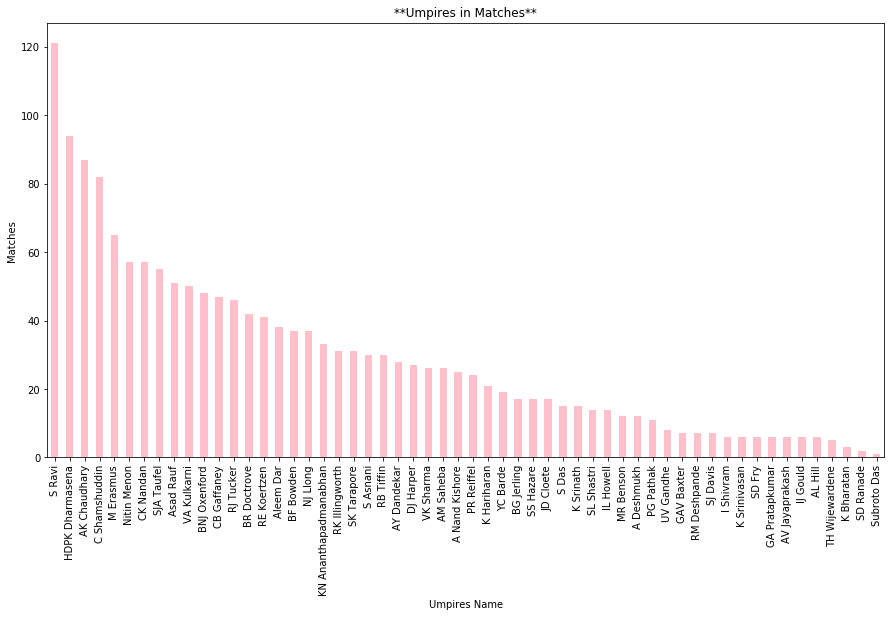

In [77]:
ump = pd.concat([df2["umpire1"],df2["umpire2"]])
ump.value_counts().plot(kind="bar", color="pink",figsize=(15,8))
plt.title("**Umpires in Matches**")
plt.xlabel('Umpires Name')
plt.ylabel('Matches')

S ravi and HDPK Dhrmasena are most popular umpires in IPL

## 4. Runs Per Season

In [78]:
batsmen= df2[["id","season"]].merge(df1, left_on='id', right_on='id',how ='left').drop('id',axis=1)
season = batsmen.groupby(["season"])["total_runs"].sum().reset_index() 

avg_each_season = df2.groupby(["season"]).count().id.reset_index()
avg_each_season.rename(columns={'id':'Matches'},inplace=1)
avg_each_season['total_runs']=season['total_runs']
avg_each_season['average_runs_per_match']=avg_each_season['total_runs']/avg_each_season['Matches']

In [79]:
avg_each_season

season  Matches  total_runs  average_runs_per_match
0     2008       58       17937              309.258621
1     2009       57       16320              286.315789
2     2010       60       18864              314.400000
3     2011       73       21154              289.780822
4     2012       74       22453              303.418919
5     2013       76       22541              296.592105
6     2014       60       18909              315.150000
7     2015       59       18332              310.711864
8     2016       60       18862              314.366667
9     2017       59       18769              318.118644
10    2018       60       19901              331.683333
11    2019       60       19400              323.333333
12    2020       60       19352              322.533333

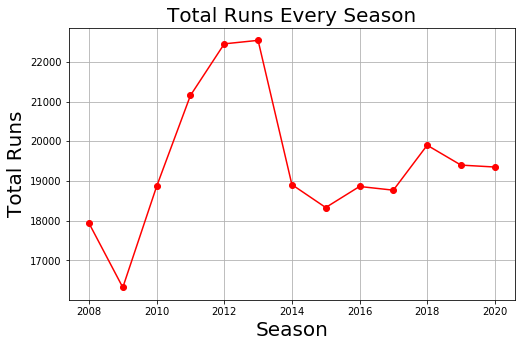

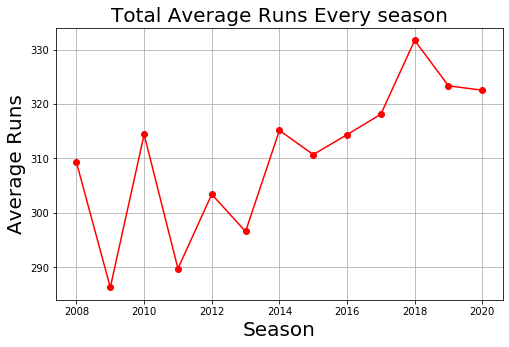

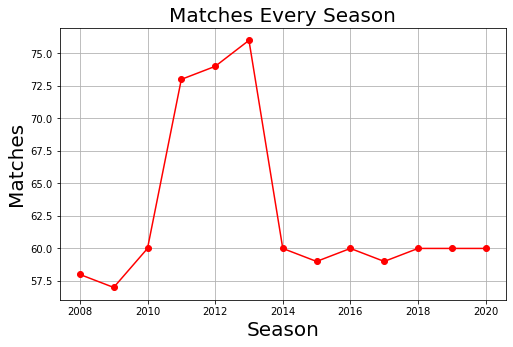

In [80]:
#Total Runs every season 
plt.figure(figsize=(8,5))
plt.plot(avg_each_season["season"],avg_each_season["total_runs"], color="red", marker='o')
plt.title("Total Runs Every Season",fontsize=20)
plt.xlabel('Season', fontsize=20)
plt.ylabel('Total Runs', fontsize=20)
plt.grid(True)
plt.show()

#Average Runs Every Season 
plt.figure(figsize=(8,5))
plt.plot(avg_each_season["season"],avg_each_season['average_runs_per_match'], color="red", marker='o')
plt.title("Total Average Runs Every season",fontsize=20)
plt.xlabel('Season', fontsize=20)
plt.ylabel('Average Runs', fontsize=20)
plt.grid(True)
plt.show()


#Matches Every Season 
plt.figure(figsize=(8,5))
plt.plot(avg_each_season["season"],avg_each_season['Matches'], color="red", marker='o')
plt.title("Matches Every Season",fontsize=20)
plt.xlabel('Season', fontsize=20)
plt.ylabel('Matches', fontsize=20)
plt.grid(True)
plt.show()

1. We see crest at 2012,2013 years (this is beacuse increase in no. of matches)
2. Average runs per match increase over years

### 4.2 Run Distribution Over Years

In [81]:
Season_boundaries=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==6).sum()).reset_index()
fours=batsmen.groupby("season")["batsman_runs"].agg(lambda x: (x==4).sum()).reset_index()
Season_boundaries=Season_boundaries.merge(fours,left_on='season',right_on='season',how='left')
Season_boundaries=Season_boundaries.rename(columns={'batsman_runs_x':'6"s','batsman_runs_y':'4"s'})

In [82]:
Season_boundaries['6"s'] = Season_boundaries['6"s']*6
Season_boundaries['4"s'] = Season_boundaries['4"s']*4
Season_boundaries['total_runs'] = season['total_runs']

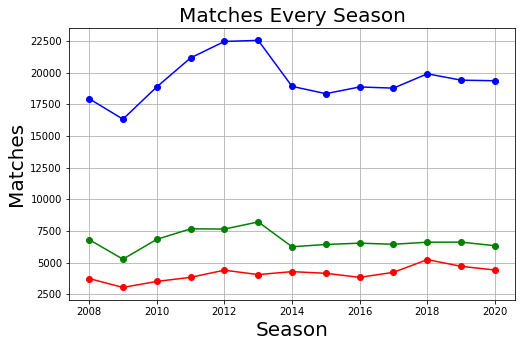

In [83]:
plt.figure(figsize=(8,5))
plt.plot(Season_boundaries["season"],Season_boundaries['6"s'], color="red", marker='o')
plt.plot(Season_boundaries["season"],Season_boundaries['4"s'], color="green", marker='o')
plt.plot(Season_boundaries["season"],Season_boundaries['total_runs'], color="blue", marker='o')
plt.title("Matches Every Season",fontsize=20)
plt.xlabel('Season', fontsize=20)
plt.ylabel('Matches', fontsize=20)
plt.grid(True)
plt.show()

In [84]:
trace1 = go.Bar(
    x=Season_boundaries['season'],
    y=Season_boundaries['total_runs']-(Season_boundaries['6"s']+Season_boundaries['4"s']),
    marker = dict(line=dict(color='#000000', width=1)),
    name='Remaining runs',opacity=0.6)

trace2 = go.Bar(
    x=Season_boundaries['season'],
    y=Season_boundaries['4"s'],
    marker = dict(line=dict(color='#000000', width=1)),
    name='Run by 4"s',opacity=0.7)

trace3 = go.Bar(
    x=Season_boundaries['season'],
    y=Season_boundaries['6"s'],
    marker = dict(line=dict(color='#000000', width=1)),
    name='Run by 6"s',opacity=0.7)


data = [trace1, trace2, trace3]
layout = go.Layout(title="Run Distribution per year",barmode='stack',xaxis = dict(tickmode='linear',title="Year"),
                                    yaxis = dict(title= "Run Distribution"), plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

## 5. Target of 200 Runs or More 

In [85]:
high_score = df1.groupby(['id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
high_score = high_score[high_score['total_runs']>=200]
hss = high_score.nlargest(10,'total_runs')

In [86]:
hss

id  inning batting_team bowling_team  total_runs
700    598027       1          RCB           PW         263
1116   980987       1          RCB           GL         248
292    419137       1          CSK           RR         246
1354  1136604       1          KKR         KXIP         245
2      335983       1          CSK         KXIP         240
1000   829795       1          RCB           MI         235
472    501260       1         KXIP          RCB         232
1480  1178422       1          KKR           MI         232
398    501223       1           DC         KXIP         231
850    733987       1         KXIP          CSK         231

### 5.1 How many times each Team scored > 200

In [87]:
high_score=high_score.groupby(['inning','batting_team']).count().reset_index()
high_score.drop(["bowling_team","total_runs"],axis=1,inplace=True)
high_score.rename(columns={"id":"total_times"},inplace=True)

high_score_1 = high_score[high_score['inning']==1]
high_score_2 = high_score[high_score['inning']==2]



In [88]:
tot = high_score_1.sort_values(by = 'total_times',ascending=False)
tot

inning batting_team  total_times
6       1          RCB           16
0       1          CSK           11
5       1           MI           11
8       1          SRH           11
3       1          KKR            8
4       1         KXIP            8
1       1           DC            6
7       1           RR            5
2       1           GL            1

In [89]:
high_score_2

inning batting_team  total_times
9        2          CSK            6
10       2           DC            1
11       2          KKR            4
12       2         KXIP            6
13       2           MI            3
14       2          RCB            2
15       2           RR            4
16       2          SRH            2

1. RCB followed by CSK are at top in creating targets of score greater than 200
2. KXIP and CSK is at top in IInd innings while chasing target

## 6. Average Score of Each Team Per Season

In [90]:
agg = df2[['id','season', 'winner', 'toss_winner', 'toss_decision', 'team1']].merge(df1, 
                                                                        left_on = 'id', right_on = 'id', how = 'left')
batsman_grp = agg.groupby(["season","id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()
runs_scored = batsmen.groupby(['season','batting_team', 'batsman'])['batsman_runs'].agg(['sum','mean']).reset_index()
runs_scored['mean']=round(runs_scored['mean'])

In [91]:
top_runs_season=runs_scored.sort_values(by="sum",ascending=False).head(10)

In [92]:
total_win=df2.groupby(['season','winner']).count()[['id']].reset_index()
winner_run["wins"]= total_win['id']

NameError: name 'winner_run' is not defined

In [93]:
#winner_runs.sort_values(by = ['season'],inplace=True)

csk= winner_runs[winner_runs['winner'] == 'CSK']
rr= winner_runs[winner_runs['winner'] == 'RR']
srh= winner_runs[winner_runs['winner'] == 'SRH']
kkr= winner_runs[winner_runs['winner'] == 'KKR']
mi= winner_runs[winner_runs['winner'] == 'MI']
rcb= winner_runs[winner_runs['winner'] == 'RCB']
kxip= winner_runs[winner_runs['winner'] == 'KXIP']
dd= winner_runs[winner_runs['winner'] == 'DC']

NameError: name 'winner_runs' is not defined

## 7.Runs Per over of each Team 

In [94]:
runs_per_over = df1.pivot_table(index=['over'], columns='batting_team',
                                values="total_runs",aggfunc=sum)
runs_per_over.reset_index(inplace=True)
runs_per_over.drop(['KTK','PW','RPS','GL'],axis=1,inplace=True)

In [95]:
trace1 = go.Scatter(x=runs_per_over['over'],y = runs_per_over['CSK'],name='CSK',marker= dict(color= "blue",size=12))
trace2 = go.Scatter(x=runs_per_over['over'],y = runs_per_over['DC'],name='DC')
trace3 = go.Scatter(x=runs_per_over['over'],y = runs_per_over['KKR'],name='KKR')
trace4 = go.Scatter(x=runs_per_over['over'],y = runs_per_over['KXIP'],name='KXIP')
trace5 = go.Scatter(x=runs_per_over['over'],y = runs_per_over['MI'],name='MI')
trace6 = go.Scatter(x=runs_per_over['over'],y = runs_per_over['RCB'],name='RCB')
trace7 = go.Scatter(x=runs_per_over['over'],y = runs_per_over['RR'],name='RR')
trace8 = go.Scatter(x=runs_per_over['over'],y = runs_per_over['SRH'],name='SRH')

data = [trace1,trace2,trace3,trace4,trace5,trace6,trace7,trace8]

layout = go.Layout(title='Average Run in Each Over',xaxis = dict(tickmode='linear',title="Over"),
                                    yaxis = dict(title= "Runs"), plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data,layout=layout)

iplot(fig)

1. Powerplay is upto six overs so there is dip in 7th over
2. MI is best at Death over (Good Finishers/Tailenders)
3. RR is worst among all in death, middle and powerplay overs

## PowerPlay Analysis
Powerplay is of starting 6 overs in t20 matches<br>
During the first six overs, a maximum of two fielders can be outside the 30-yard circle.

### 8.1 Runs in PowerPlay of Each Match

In [96]:
season=df2[['id','season','winner']]
complete_data=df1.merge(season, how='inner', left_on='id', right_on='id')

In [97]:
powerplay_data=complete_data[complete_data['over']<=6]

inn1 = powerplay_data[powerplay_data['inning']==1].groupby('id')['total_runs'].agg(['sum']).reset_index()
inn2 = powerplay_data[powerplay_data['inning']==2].groupby('id')['total_runs'].agg(['sum']).reset_index()

In [98]:
inn1.reset_index(inplace=True)
inn1.drop(["id"],axis=1,inplace=True)

inn2.reset_index(inplace=True)
inn2.drop(["id"],axis=1,inplace=True)

In [99]:
fig = {"data" : [{"x" : inn1["index"],"y" : inn1["sum"],"marker" : {"color" : "blue","size": 2},
                  "line": {"width" : 1.5},"type" : "scatter","mode" : "lines" },
        
                 {"x" : inn2["index"],"y" : inn2["sum"],"marker" : {"color" : "brown","size": 2},
                  "type" : "scatter","line": {"width" : 1.5},"mode" : "lines",
                  "xaxis" : "x2","yaxis" : "y2",}],
       
        "layout" : {"title": "Inning 1 vs Inning 2 in Powerplay Overs",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : False},
                    "yaxis2" : {"domain" : [.55, 1],"anchor" : "x2","title": "Inn2 Powerplay"},
                    "margin" : {"b" : 111},
                    "xaxis" : {"domain" : [0, 1],"title": "Matches"},
                    "yaxis" : {"domain" :[0, .45], "title": "Inn1 Poweplay"}}}

iplot(fig)

### 8.2 Powerplay Average Runs

In [100]:
pi1 = powerplay_data[powerplay_data['inning']==1].groupby(['season',"id"])["total_runs"].agg(["sum"])
pi1=pi1.reset_index().groupby("season")["sum"].mean()
pi1=pi1.to_frame().reset_index()

pi2=powerplay_data[ powerplay_data['inning']==2].groupby(['season','id'])['total_runs'].agg(['sum'])
pi2=pi2.reset_index().groupby('season')['sum'].mean()
pi2=pi2.to_frame().reset_index()


Text(0, 0.5, 'Runs')

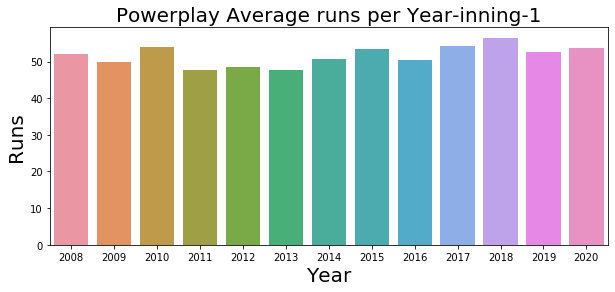

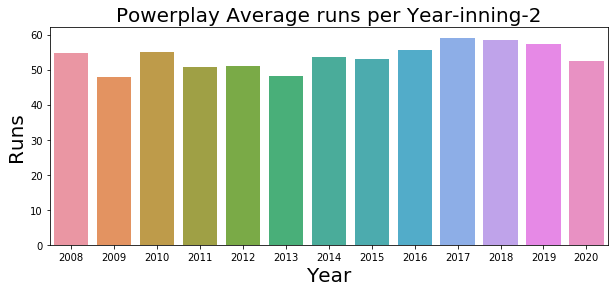

In [101]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='season',y="sum", data=pi1)
plt.title("Powerplay Average runs per Year-inning-1",fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs', fontsize=20)


fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='season',y="sum", data=pi2)
plt.title("Powerplay Average runs per Year-inning-2",fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs', fontsize=20)

So there is increase in runs in powerplay in last few years

### 8.3 Poweplay Average Dismissals

In [102]:
powerplay_dismissals=powerplay_data.dropna(subset=['dismissal_kind']).groupby(['season','id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].max()
powerplay_dismissals=powerplay_dismissals.reset_index()

powerplay_dismissals_first=powerplay_data[ powerplay_data['inning']==1].dropna(subset=['dismissal_kind']).groupby(['season','id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].mean()
powerplay_dismissals_first=powerplay_dismissals_first.reset_index()

powerplay_dismissals_second=powerplay_data[ powerplay_data['inning']==2].dropna(subset=['dismissal_kind']).groupby(['season','id','inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].mean()
powerplay_dismissals_second=powerplay_dismissals_second.reset_index()


In [108]:
powerplay_dismissals

season  count
0     2008      4
1     2009      5
2     2010      4
3     2011      6
4     2012      6
5     2013      6
6     2014      5
7     2015      5
8     2016      5
9     2017      6
10    2018      4
11    2019      7
12    2020      6

Text(0, 0.5, 'Runs')

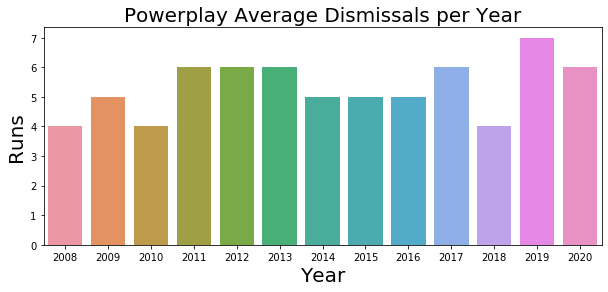

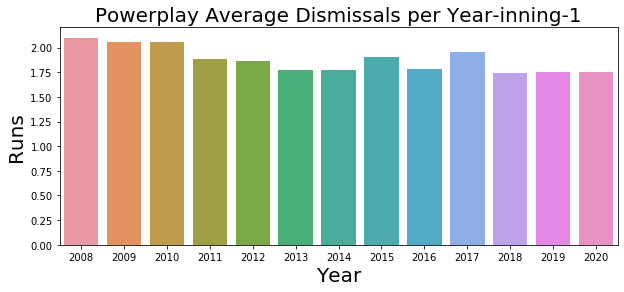

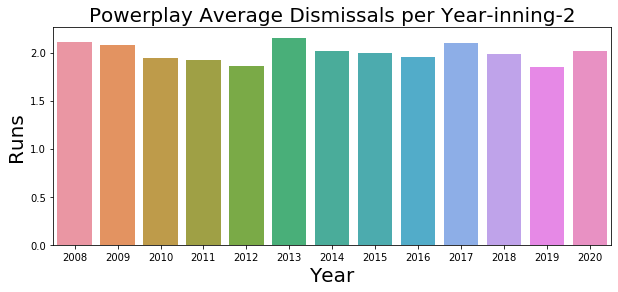

In [109]:
fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='season',y="count", data=powerplay_dismissals)
plt.title("Powerplay Average Dismissals per Year",fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs', fontsize=20)


fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='season',y="count", data=powerplay_dismissals_first)
plt.title("Powerplay Average Dismissals per Year-inning-1",fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs', fontsize=20)


fig_dims = (10, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='season',y="count", data=powerplay_dismissals_second)
plt.title("Powerplay Average Dismissals per Year-inning-2",fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs', fontsize=20)


In [110]:
trace1 = go.Bar(x=powerplay_dismissals.season,y=powerplay_dismissals["count"],
                name='Max',opacity=0.4)

trace2 = go.Bar(x=powerplay_dismissals_first.season,y=powerplay_dismissals_first["count"],name='Inning 1',
                marker=dict(color='red'),opacity=0.4)

trace3 = go.Bar(x=powerplay_dismissals_second.season,y=powerplay_dismissals_second["count"],name='Inning 2',
                marker=dict(color='lime'),opacity=0.4)

data = [trace1, trace2, trace3]
layout = go.Layout(title='Powerplay Average Dismissals per Year',
                   xaxis=dict(title='Year',tickmode='linear'),
                   yaxis=dict(title='Run'),bargap=0.2,bargroupgap=0.1, plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

1. Maximum fall of wickets in powerplay overs set new recort in 2019
2. Dismissals in 2nd innings decrease significantly in 2019, 2020

## 9. Batsman Data

In [115]:
df_strike_rate = df1.groupby(["batsman"]).agg({'ball':'count','batsman_runs':'mean'}).sort_values(by='batsman_runs',ascending=False)
df_strike_rate.rename(columns={'batsman_runs':'strike rate'},inplace=True)
df_runs_per_match = df1.groupby(['batsman','id']).agg({"batsman_runs":"sum"})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum','mean','count'})
df_total_runs.rename(columns={'sum':"batsman run",'count':'match count','mean':'average score'},inplace=True)
df_total_runs.columns = df_total_runs.columns.droplevel()
df_sixes = df1[['batsman','batsman_runs']][df1.batsman_runs==6].groupby(["batsman"]).agg({'batsman_runs':"count"})
df_four = df1[['batsman','batsman_runs']][df1.batsman_runs==4].groupby(["batsman"]).agg({'batsman_runs':"count"})

df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate,df_total_runs, left_index=True, right_index=True),
                                   df_sixes, left_index=True, right_index=True),df_four, left_index=True, right_index=True)



In [117]:
df_batsman_stat.rename(columns = {'ball' : 'ball', 'strike rate':'strike_rate','batsman run' : 'batsman_run',
                                  'match count' : 'match_count','average score' : 'average_score' ,'batsman_runs_x' :'six',
                                  'batsman_runs_y':'four'},inplace=True)
df_batsman_stat['strike_rate'] = df_batsman_stat['strike_rate']*100
df_batsman_stat.sort_values(by='batsman_run',ascending=False,inplace=True)
#df_batsman_stat.sort_values(by='batsman_run',ascending=False)
df_batsman_stat.reset_index(inplace=True)

In [120]:
df_batsman_stat.head()

batsman  ball  strike_rate  average_score  match_count  batsman_run  six  \
0    V Kohli  4609   127.533087      31.945652          184         5878  202   
1   SK Raina  4041   132.838406      28.402116          189         5368  194   
2  DA Warner  3819   137.575281      37.000000          142         5254  195   
3  RG Sharma  4088   127.935421      26.958763          194         5230  214   
4   S Dhawan  4208   123.502852      29.697143          175         5197  109   

   four  
0   504  
1   493  
2   510  
3   458  
4   591

### 9.1 Highest Average and Strike rate for >50 Matches

In [121]:
average_score = df_batsman_stat.sort_values(by="average_score",ascending=False)
average_score = average_score[average_score["match_count"]>50].head(10)

strike_rate = df_batsman_stat.sort_values(by="strike_rate",ascending=False)
strike_rate = strike_rate[strike_rate["match_count"]>50].head(10)

Text(0, 0.5, 'Strike Rate')

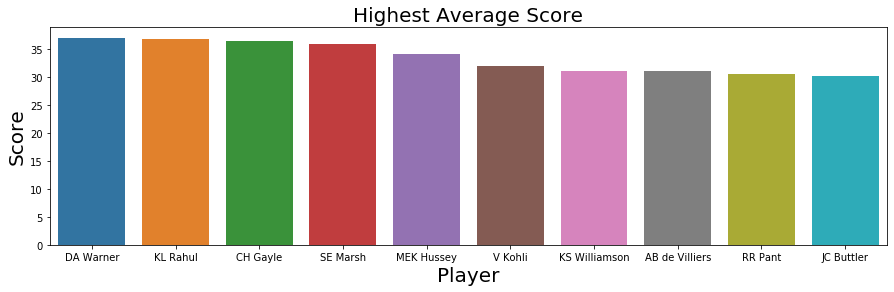

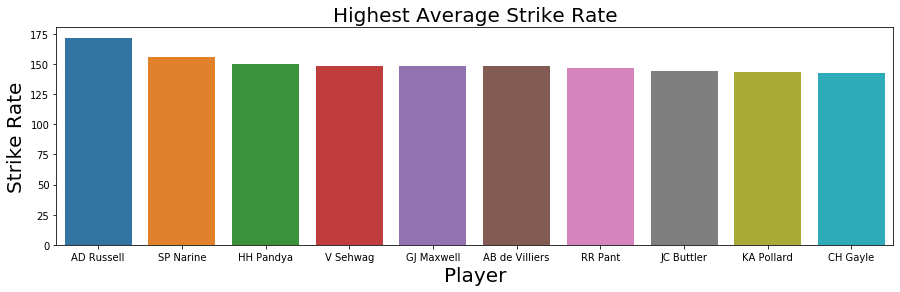

In [127]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='batsman',y="average_score", data=average_score)
plt.title("Highest Average Score",fontsize=20)
plt.xlabel('Player', fontsize=20)
plt.ylabel('Score', fontsize=20)


fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='batsman',y="strike_rate", data=strike_rate)
plt.title("Highest Average Strike Rate",fontsize=20)
plt.xlabel('Player', fontsize=20)
plt.ylabel('Strike Rate', fontsize=20)

No doubt **Warner, Gayle and Pant** are best in terms of both strike rate and average run rate.

<a id="ss13"></a>
### 9.2 Top 20 Batsman

In [131]:
top_df_batsman = df_batsman_stat.head(20)
top_df_batsman.head(5)

batsman  ball  strike_rate  average_score  match_count  batsman_run  six  \
0    V Kohli  4609   127.533087      31.945652          184         5878  202   
1   SK Raina  4041   132.838406      28.402116          189         5368  194   
2  DA Warner  3819   137.575281      37.000000          142         5254  195   
3  RG Sharma  4088   127.935421      26.958763          194         5230  214   
4   S Dhawan  4208   123.502852      29.697143          175         5197  109   

   four  
0   504  
1   493  
2   510  
3   458  
4   591

In [132]:
data=[{"y": top_df_batsman.match_count,
        "x": top_df_batsman.batsman,
        "mode":"markers",
        "marker":{"color":top_df_batsman.six,"size" :top_df_batsman.average_score,'showscale': True},
        "text":top_df_batsman.batsman }]

iplot(data)

1. Virat Kohli has highest total runs across all seasons. Raina is just few runs behind with the second spot.
2. Average Score and 6"s by Parthiv Patel is lowest among top 20 batsmen.

<a id="ss14"></a>
### 9.3 Top 10 Batsman in each run category

In [133]:
toppers = df1.groupby(['batsman','batsman_runs'])["total_runs"].count().reset_index()
toppers = toppers.pivot('batsman','batsman_runs','total_runs')
toppers.reset_index(inplace =True)

In [136]:
top_6 = toppers.sort_values(6,ascending=False).head(10)
top_4 = toppers.sort_values(4,ascending=False).head(10)
top_2 = toppers.sort_values(2,ascending=False).head(10)
top_1 = toppers.sort_values(1,ascending=False).head(10)

In [139]:
trace1 = go.Scatter(x=top_6.batsman,y =top_6[6],name='6"s',marker =dict(color= "blue",size = 9),line=dict(width=2,dash='dash'))
trace2 = go.Scatter(x=top_4.batsman,y = top_4[4],name='4"s',marker =dict(color= "orange",size = 9),line=dict(width=2,dash='longdash'))
trace3 = go.Scatter(x=top_2.batsman,y = top_2[2],name='2"s',marker =dict(color= "green",size = 9),line=dict(width=2,dash='dashdot'))
trace4 = go.Scatter(x=top_1.batsman,y = top_1[1],name='1"s',marker =dict(color= "red",size = 9),line=dict(width=2,dash='longdashdot'))

fig = tools.make_subplots(rows=4, cols=1, subplot_titles=('Top 6"s Scorer','Top 4"s Scorer',
                                                          'Top 2"s Scorer','Top 1"s Scorer'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)

fig['layout'].update(title='Top Scorer in each Category',showlegend=False, plot_bgcolor='rgb(245,245,245)')
iplot(fig)

C:\Users\SAAD KHAN\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



1. Difference between 6"s by Gayle(1st) and AB de Villiers(2nd) is of 113.
2. Many caribbean players are in top list of 6"s and 4"s.

<a id="ss15"></a>
### 9.4 Orange Cap Holders

In [140]:
orange=df2[['id','season']]
orange=orange.merge(df1, left_on='id', right_on='id', how='left')
orange=orange.groupby(['season','batsman'])['batsman_runs'].sum().reset_index()
orange=orange.sort_values('batsman_runs',ascending=0)
orange=orange.drop_duplicates(subset=["season"],keep="first")

In [145]:
orange

season        batsman  batsman_runs
1383    2016        V Kohli           973
1594    2018  KS Williamson           735
684     2012       CH Gayle           733
910     2013     MEK Hussey           733
1694    2019      DA Warner           692
1866    2020       KL Rahul           670
1088    2014     RV Uthappa           660
1422    2017      DA Warner           641
446     2010   SR Tendulkar           618
115     2008       SE Marsh           616
502     2011       CH Gayle           608
229     2009      ML Hayden           572
1148    2015      DA Warner           562

Text(0, 0.5, 'Runs')

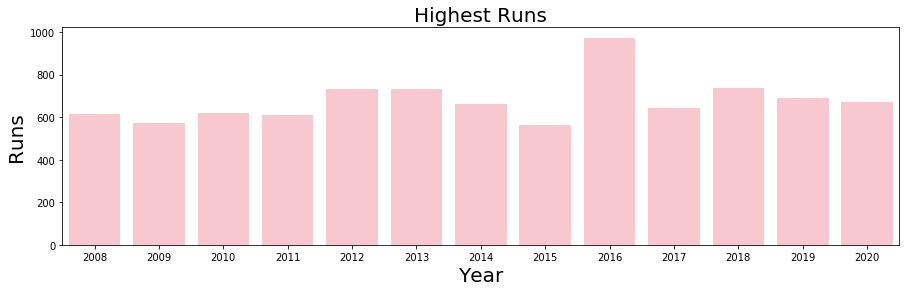

In [177]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='season',y="batsman_runs", data=orange,color='pink')
plt.title("Highest Runs",fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Runs', fontsize=20)

<ul><li> Virat kohli owned Orange cap with highesr 973 runs in 2016

<a id="s10"></a>
## 10. Bowlers Analysis

<a id="ss16"></a>
### 10.1 Best Bowler in Each category

In [154]:
bowlers=df1.groupby('bowler').sum().reset_index()
bowl=df1['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(bowl,left_on='bowler',right_on='index',how='left')
bowlers=bowlers[['bowler_x','total_runs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','total_runs':'runs_given','bowler_y':'balls'},axis=1,inplace=True)
bowlers['overs']=(bowlers['balls']//6)

In [161]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct=df1[df1["dismissal_kind"].isin(dismissal_kinds)]
ct=ct['bowler'].value_counts().reset_index()
bowlers=bowlers.merge(ct,left_on='bowler',right_on='index',how='left').dropna()
bowlers=bowlers[['bowler_x','runs_given','overs','bowler_y']]
bowlers.rename({'bowler_x':'bowler','bowler_y':'wickets'},axis=1,inplace=True)
bowlers['economy']=(bowlers['runs_given']/bowlers['overs'])


In [168]:
bowlers_top=bowlers.sort_values(by='runs_given',ascending=False)
bowlers_top=bowlers_top.head(20)
bowlers_top.head()

bowler  runs_given  overs  wickets   economy
276        PP Chawla        4330    547    156.0  7.915905
133  Harbhajan Singh        4038    575    150.0  7.022609
6           A Mishra        3913    538    160.0  7.273234
99          DJ Bravo        3869    474    153.0  8.162447
281         R Ashwin        3756    554    138.0  6.779783

In [169]:
bowlers_top=bowlers.sort_values(by='wickets',ascending=False)
bowlers_top=bowlers_top.head(20)
bowlers_top.head()

bowler  runs_given  overs  wickets   economy
350       SL Malinga        3486    495    170.0  7.042424
6           A Mishra        3913    538    160.0  7.273234
276        PP Chawla        4330    547    156.0  7.915905
99          DJ Bravo        3869    474    153.0  8.162447
133  Harbhajan Singh        4038    575    150.0  7.022609

1. Hightest wicket taker is Malinga.
2. Piyush Chawla give highest runs among all.

<a id="ss17"></a>
### 10.2 Purple Cap Holders

In [171]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
purple=df1[df1["dismissal_kind"].isin(dismissal_kinds)]
purple=purple.merge(df2,left_on='id',right_on='id',how='outer')
purple=purple.groupby(['season','bowler'])['dismissal_kind'].count().reset_index()
purple=purple.sort_values('dismissal_kind',ascending=False)
purple=purple.drop_duplicates('season',keep='first').sort_values(by='season')
purple.rename({'dismissal_kind':'count_wickets'},axis=1,inplace=True)

In [179]:
purple

season         bowler  count_wickets
75      2008  Sohail Tanvir             22
152     2009       RP Singh             23
241     2010        PP Ojha             21
367     2011     SL Malinga             28
437     2012       M Morkel             25
509     2013       DJ Bravo             32
639     2014      MM Sharma             23
695     2015       DJ Bravo             26
774     2016        B Kumar             23
861     2017        B Kumar             26
943     2018         AJ Tye             24
1049    2019    Imran Tahir             26
1142    2020       K Rabada             30

Text(0, 0.5, 'wickets')

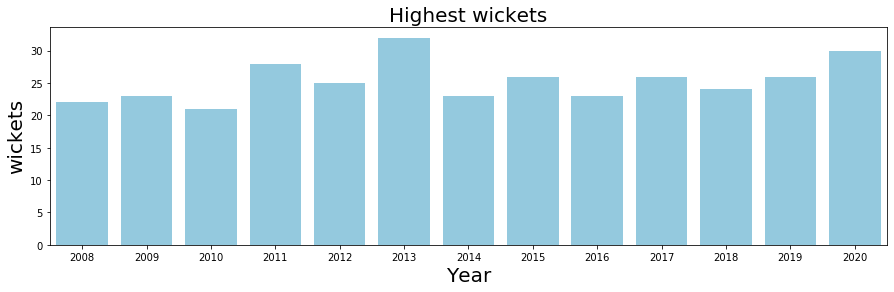

In [186]:
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='season',y="count_wickets", data=purple ,color='skyblue')
plt.title("Highest wickets",fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('wickets', fontsize=20)

<ul><li> DJ Brave owned Purple cap with highest 32 wickets in 2013

<a id="ss21"></a>
## 10.3 Top 10 Bowlers

In [188]:
bowling_wickets= df1[df1['dismissal_kind']!='run out']
bowling_tot= bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count= bowling_tot.groupby('bowler').count().reset_index()
bowling_top= bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers= bowling_top.loc[:,['bowler','Wickets']][0:10] 

In [190]:
trace1 = go.Scatter(
    x = top_bowlers['bowler'].values,
    y = top_bowlers['Wickets'].values,
    mode = 'lines+markers',
)

layout = go.Layout(title="Top 10 Bowlers in IPL- Seasons 2008-2019",
                   xaxis=dict(title="TOP 10 Bowlers"),
                   yaxis=dict(title="Wickets Taken"),
                  plot_bgcolor='rgb(245,245,245)')


data = [trace1]

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="ss22"></a>
## 10.4 Top 10 Bowling Performance till 2020

In [192]:
match_bowling_tot=bowling_wickets.groupby(['id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['id','bowler','Wickets']][0:10] 
match_bowling_runs=df1.groupby(['id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['id','bowler'],right_on=['id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance, df1,how='inner',left_on=['id','bowler'],right_on=['id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']

In [193]:
trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'markers',
    name="Wickets"
)

trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'lines+markers',
    name="Run Per Wicket"
)

layout = go.Layout(title="IPL Best bowling performances in a Match",
                   xaxis=dict(title="Top Bowlers"),
                   yaxis=dict(title="Runs per Wicket/Wickets"),
                  plot_bgcolor='rgb(245,245,245)')


data = [trace1, trace2]


fig = go.Figure(data=data, layout=layout)
iplot(fig)

<a id="s11"></a>
## 11. Winner Analysis

In [195]:
season_winner=df2.drop_duplicates(subset=['season'], keep='last')[['season','winner']].reset_index(drop=True)
season_winner = season_winner['winner'].value_counts()

season_winner = season_winner.to_frame()
season_winner.reset_index(inplace=True)
season_winner.rename(columns={'index':'team'},inplace=True)

<a id="ss18"></a>
### 11.1 Which team win highest no. of seasons

In [199]:
trace0 = go.Pie(labels=season_winner['team'], values=season_winner['winner'],
              hoverinfo='label+value+name',name="Winner", marker=dict(line=dict(color='#000000', width=1.5)))

layout=go.Layout(title='Winner of IPL season')
fig = go.Figure(data=[trace0], layout=layout)
iplot(fig)

<a id="ss19"></a>
### 11.2 Match Played vs wins in Final Match of Every Season

In [200]:
finals=df2.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()

In [201]:
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)
most_finals.reset_index(inplace=True)

In [202]:
trace1 = go.Bar(x=most_finals.team,y=most_finals.finals_played,
                name='Total Matches',marker=dict(line=dict(color='#000000', width=1.5)), opacity=0.4)

trace2 = go.Bar(x=most_finals.team,y=most_finals.won_count,
                name='Matches Won',marker=dict(color='red', line=dict(color='#000000', width=1.5)),opacity=0.4)

data = [trace1, trace2]

layout = go.Layout(title='Match Played vs Wins In Finals',xaxis=dict(title='Team'),
                   yaxis=dict(title='Count'),bargap=0.2,bargroupgap=0.1, plot_bgcolor='rgb(245,245,245)')

fig = go.Figure(data=data, layout=layout)
iplot(fig)